# 6.4 Sequence processing with convnets

In chapter 5, we learned about convolutional neural networks (convnets) and how they perform particularly well on computer vision problems, due to their ability to **operate convolutionally, extracting features from local input patches and allowing for representation modularity and data efficiency**. 

The same properties that make convnets excel at computer vision also make them highly relevant to sequence processing. **Time can be treated as a spatial dimension, like the height or width of a 2D image**.

Such 1D convnets can be competitive with RNNs on certain sequence-processing problems, usually at a **considerably cheaper computational cost**. It has long been known that **small 1D convnets can offer a fast alternative to RNN s for simple tasks such as text classification and timeseries forecasting**.

## 6.4.1 Understanding 1D convolution for sequence data

The convolutional layers introduced before were **2D convolutions**, extracting 2D patches from image tensors and applying an identical transformation to every patch.

In the same way, we can use **1D convolutions: extracting local 1D patches (sub-sequence) from sequences**.

### Such 1D convolution layers can recognize local patterns in a sequence.
Because the same input transformation is performed on every patch, **a pattern learned at a certain position in a sequence can later be recognized at a different position, making 1D convnets translation invariant(for temporal translations)**

## 6.4.2 1D pooling for sequence data

We have been familiar with 2D pooling operations: such as 2D average pooling and max pooling, used in convnets to **spatically downsample image tensors**.

The 2D pooling operation has a 1D equivalent: **extracting 1D patches(sub-sequences) from an input and outputting the maximum value(max pooling) or average value(average pooling)**. Just as with 2D convnets, this is used for reducing the length of 1D inputs(**sub-sampling**).

## 6.4.3 Implementing a 1D convnet

In Keras, We use a 1D convnet via the **Conv1D** layer. It takes as input 3D tensors with shape **(samples, time, features)** and returns similarly shaped 3D tensors. **The convolutional window is a 1D window on the temporal axis: axis 1 in the input tensor**.

### We build a simple two-layer 1D convnet and apply it to the IMDB sentiment-classification task.

In [2]:
# prepare the data
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
max_len = 500

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)

print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Using TensorFlow backend.


Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 500)
x_test shape: (25000, 500)


1D convnets are structured in the same way as their 2D counterparts, consisting of **a stack of Conv1D and MaxPooling1D layers, ending in either a global pooling layer or a Flatten layer, that turn the 3D outputs into 2D outputs, allowing you to add one or more Dense layers to the model for classification or regression**.

### One difference, though, is the fact that you can afford to use larger convolution windows with 1D convnets. 

With a 2D convolution layer, a 3 × 3 convolution window contains 3 × 3 = 9 feature vectors; but with a 1D convolution layer, a convolution window of size 3 contains only 3 feature vectors. You can thus easily afford 1D convolution windows of size 7 or 9.

In [3]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Embedding(max_features, 128, input_length = max_len))
model.add(layers.Conv1D(32, 7,  activation = 'relu'))
model.add(layers.MaxPooling1D(5))

model.add(layers.Conv1D(32, 7, activation = 'relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))

model.summary()

W0712 18:37:07.239779 139971567470336 deprecation_wrapper.py:119] From /usr/local/miniconda3/envs/dl/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0712 18:37:07.264347 139971567470336 deprecation_wrapper.py:119] From /usr/local/miniconda3/envs/dl/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0712 18:37:07.268818 139971567470336 deprecation_wrapper.py:119] From /usr/local/miniconda3/envs/dl/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0712 18:37:07.323707 139971567470336 deprecation_wrapper.py:119] From /usr/local/miniconda3/envs/dl/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 128)          1280000   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 494, 32)           28704     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 98, 32)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 92, 32)            7200      
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 1,315,937
Trainable params: 1,315,937
Non-trainable params: 0
_________________________________________________________________


In [4]:
model.compile(optimizer = RMSprop(lr=1e-4),
              loss = 'binary_crossentropy',
              metrics = ['acc'])

W0712 18:37:09.613224 139971567470336 deprecation_wrapper.py:119] From /usr/local/miniconda3/envs/dl/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0712 18:37:09.624810 139971567470336 deprecation_wrapper.py:119] From /usr/local/miniconda3/envs/dl/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0712 18:37:09.634527 139971567470336 deprecation.py:323] From /usr/local/miniconda3/envs/dl/lib/python3.6/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [5]:
history = model.fit(x_train, y_train,
                    epochs = 10,
                    batch_size = 128,
                    validation_split = 0.2)

W0712 18:37:12.885563 139971567470336 deprecation_wrapper.py:119] From /usr/local/miniconda3/envs/dl/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 16s 788us/step - loss: 0.8337 - acc: 0.5094 - val_loss: 0.6874 - val_acc: 0.5638
Epoch 2/10
20000/20000 [==============================] - 2s 105us/step - loss: 0.6699 - acc: 0.6386 - val_loss: 0.6642 - val_acc: 0.6572
Epoch 3/10
20000/20000 [==============================] - 2s 103us/step - loss: 0.6236 - acc: 0.7531 - val_loss: 0.6080 - val_acc: 0.7430
Epoch 4/10
20000/20000 [==============================] - 2s 101us/step - loss: 0.5258 - acc: 0.8078 - val_loss: 0.4846 - val_acc: 0.8062
Epoch 5/10
20000/20000 [==============================] - 2s 103us/step - loss: 0.4095 - acc: 0.8491 - val_loss: 0.4315 - val_acc: 0.8302
Epoch 6/10
20000/20000 [==============================] - 2s 105us/step - loss: 0.3473 - acc: 0.8670 - val_loss: 0.4152 - val_acc: 0.8346
Epoch 7/10
20000/20000 [==============================] - 2s 103us/step - loss: 0.3074 - acc: 0.8648 - val_loss: 0.4254 - 

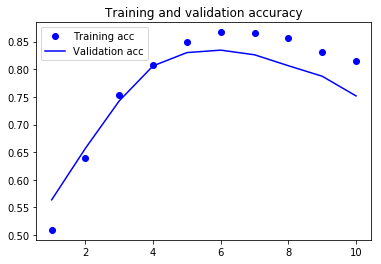

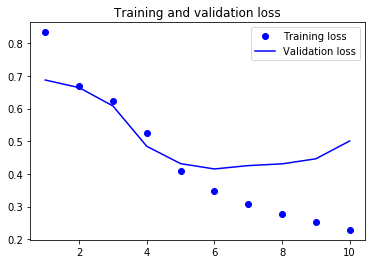

In [7]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Validation accuracy is somewhat less than that of LSTM, but runtime is faster on 1D Convnets, at this point we could retrain the model for the number of epochs (8) and run it on the test set.

This is a convincing demonstration that a 1D convnet can offer a fast, cheap alternative to a recurrent network on a word-level sentiment classification task.

## 6.4.4 Combine CNNs and RNNs to process long sequences

Because 1D convnets process input patches independently, they are **not sensitive to the order of the timesteps (beyond a local scale, the size of the convolutional windows)**, unlike RNNs.

Of course, to recognize longer-term patterns, you can stack many convolutional and pooling layers, **resulting in upper layers will see long chunks of the original inputs** --- but that's still a weak way to induce order sensitivity.

### One way to evidence this weakness is to try 1D convnets on the temperature-forecasting problem, where order-sensitivity is key to producing good predictions. We first reload the variables defined before:

In [8]:
import os 
import numpy as np

data_dir = '/input'
fname = os.path.join(data_dir, 'jena_climate_2009_2016.csv')

f = open(fname)
data = f.read()
f.close()

lines = data.split('\n')
header = lines[0].split(',')
lines = lines[1:]

float_data = np.zeros((len(lines), len(header) - 1))

for i, line in enumerate(lines):
    values = [float(x) for x in line.split(',')[1:]]
    float_data[i, :] = values
    
# normalization
mean = float_data[:200000].mean(axis = 0)
std = float_data[:200000].std(axis = 0)

float_data -= mean
float_data /= std

In [9]:
def generator(data, lookback,  delay, min_index, max_index,
              shuffle = False, batch_size = 128, step = 6):
    
    if max_index is None:
        max_index = len(data) - delay - 1
    
    i = min_index + lookback
    while 1:
        if shuffle:
            rows = np.random.randint(min_index + lookback, max_index, size = batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)
        
        samples = np.zeros((len(rows), lookback // step, data.shape[-1]))
        targets = np.zeros((len(rows), ))
        
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][1]
        
        yield samples, targets

In [10]:
lookback = 720
step = 6
delay = 144
batch_size = 128

train_gen = generator(float_data, lookback = lookback, delay = delay,
                      min_index = 0, max_index = 200000, shuffle = True, step = step, batch_size = batch_size)

val_gen = generator(float_data, lookback = lookback, delay = delay,
                      min_index = 200001, max_index = 300000, shuffle = True, step = step, batch_size = batch_size)

test_gen = generator(float_data, lookback = lookback, delay = delay,
                      min_index = 300000, max_index = None, shuffle = True, step = step, batch_size = batch_size)

val_steps = (300000 - 200001 - lookback) // 128 # How many steps to draw from val_gen in order to see the entire val_set
test_steps = (len(float_data) - 300001 - lookback) // 128

In [11]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Conv1D(32, 5, activation = 'relu',
                        input_shape = (None, float_data.shape[-1])))
model.add(layers.MaxPooling1D(3))

model.add(layers.Conv1D(32, 5, activation = 'relu'))
model.add(layers.MaxPooling1D(3))
model.add(layers.Conv1D(32, 5, activation = 'relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))

In [12]:
model.compile(optimizer = RMSprop(), loss = 'mae')

In [13]:
history = model.fit_generator(train_gen,
                              steps_per_epoch = 500,
                              epochs = 20,
                              validation_data = val_gen,
                              validation_steps = val_steps)

Epoch 1/20
500/500 [==============================] - 14s 28ms/step - loss: 0.3963 - val_loss: 0.3825
Epoch 2/20
500/500 [==============================] - 14s 27ms/step - loss: 0.3343 - val_loss: 0.4270
Epoch 3/20
500/500 [==============================] - 14s 27ms/step - loss: 0.3021 - val_loss: 0.3912
Epoch 4/20
500/500 [==============================] - 13s 26ms/step - loss: 0.2801 - val_loss: 0.4235
Epoch 5/20
500/500 [==============================] - 13s 26ms/step - loss: 0.2672 - val_loss: 0.4143
Epoch 6/20
500/500 [==============================] - 13s 26ms/step - loss: 0.2557 - val_loss: 0.3946
Epoch 7/20
500/500 [==============================] - 13s 26ms/step - loss: 0.2470 - val_loss: 0.4197
Epoch 8/20
500/500 [==============================] - 13s 27ms/step - loss: 0.2393 - val_loss: 0.3910
Epoch 9/20
500/500 [==============================] - 13s 27ms/step - loss: 0.2327 - val_loss: 0.3983
Epoch 10/20
500/500 [==============================] - 14s 27ms/step - loss: 0.228

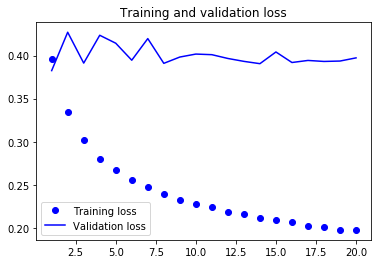

In [14]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

The validation MAE stays in the 0.40s: you can't even beat the common-sense baseline using the small convnet.

Again, this is because the convnet looks for **patterns anywhere in the input timeseries and has no knowledge of the temporal position of a pattern it sees (toward the beginning, toward the end, and so on)**. Because more recent
data points should be interpreted differently from older data points in the case of this specific forecasting problem, the convnet fails at producing meaningful results. 

This limitation of convnets isn’t an issue with the IMDB data, because patterns of keywords associated with a positive or negative sentiment are informative independently of their positions in the input sentences.

### One strategy to combine the speed & lightness of convnets with the order-sensitivity of RNNs is to use a 1D convnet as a preprocessing step before an RNN.

This is especially beneficial when dealing with sequences that are so long they can’t realistically be processed with RNNs, such as sequences with thousands of steps. **The convnet will turn the long input sequence into much shorter (downsampled) sequences of higher-level features. This sequence of extracted features then becomes the input to the RNN part of the network**.

Let's try this technique on the temperature-forecasting dataset. Because this strategy allows you to manipulate much longer sequences, we can either**look at data from longer ago(increase lookback parameter)** or **look at high-resolution timeseries(decrease step parameter)**.

Here we half the step parameter to 3, meaning the temperature data is sampled at a rate of 1 point 30 minutes, to obtain a timeseries twice long. 

In [15]:
step = 3
lookback = 720
delay = 144

train_gen = generator(float_data,
                      lookback=lookback,
                      delay=delay,
                      min_index=0,
                      max_index=200000,
                      shuffle=True,
                      step=step)

val_gen = generator(float_data,
                    lookback=lookback,
                    delay=delay,
                    min_index=200001,
                    max_index=300000,
                    step=step)

test_gen = generator(float_data,
                     lookback=lookback,
                     delay=delay,
                     min_index=300001,
                     max_index=None,
                     step=step)

val_steps = (300000 - 200001 - lookback) // 128
test_steps = (len(float_data) - 300001 - lookback) // 128

In [16]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Conv1D(32, 5, activation='relu',
                        input_shape=(None, float_data.shape[-1])))
model.add(layers.MaxPooling1D(3))

model.add(layers.Conv1D(32, 5, activation='relu'))
model.add(layers.GRU(32, dropout=0.1, recurrent_dropout=0.5))
model.add(layers.Dense(1))

model.summary()

W0712 18:43:37.114564 139971567470336 deprecation.py:506] From /usr/local/miniconda3/envs/dl/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_6 (Conv1D)            (None, None, 32)          2272      
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, None, 32)          0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, None, 32)          5152      
_________________________________________________________________
gru_1 (GRU)                  (None, 32)                6240      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 13,697
Trainable params: 13,697
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(optimizer=RMSprop(), loss='mae')

In [18]:
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=20,
                              validation_data=val_gen,
                              validation_steps=val_steps)

Epoch 1/20
500/500 [==============================] - 153s 306ms/step - loss: 0.3406 - val_loss: 0.2805
Epoch 2/20
500/500 [==============================] - 148s 296ms/step - loss: 0.3054 - val_loss: 0.2777
Epoch 3/20
500/500 [==============================] - 148s 297ms/step - loss: 0.2928 - val_loss: 0.3036
Epoch 4/20
500/500 [==============================] - 150s 300ms/step - loss: 0.2866 - val_loss: 0.2742
Epoch 5/20
500/500 [==============================] - 150s 300ms/step - loss: 0.2779 - val_loss: 0.2756
Epoch 6/20
500/500 [==============================] - 149s 298ms/step - loss: 0.2733 - val_loss: 0.2752
Epoch 7/20
500/500 [==============================] - 150s 299ms/step - loss: 0.2663 - val_loss: 0.2959
Epoch 8/20
500/500 [==============================] - 148s 296ms/step - loss: 0.2613 - val_loss: 0.2758
Epoch 9/20
500/500 [==============================] - 151s 302ms/step - loss: 0.2581 - val_loss: 0.2833
Epoch 10/20
500/500 [==============================] - 149s 297m

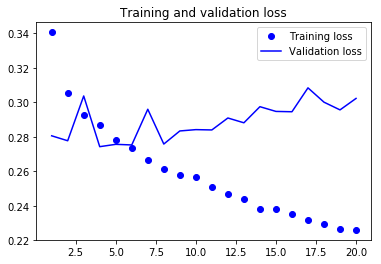

In [19]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

###  Judging from the validation loss, this setup isn't as good as the regularized GRU alone, but it's significantly faster. It looks at twice as much data, which in this case does not seem hugely helpful, but maybe important for other datasets.